# Generación de imágenes con Autoencoders y GMM

En esta ocasión vamos a trabajar con el _dataset_ Fashion MNIST, un _dataset_ de imágenes de $28\times28$ en blanco y negro de prendas de ropa. Son 10 tipos de prendas en total (para una referencia mira [acá](https://github.com/zalandoresearch/fashion-mnist)). 

Lo que vamos a hacer es generar imagenes nuevas gracias al modelo GMM. A grandes rasgos los pasos son:

- Entrenar un _Autoencoder_ que aprenda a reducir la dimensionalidad del _dataset_ Fashion MNIST.
- Usar GMM para encontrar _clusters_ para la versión reducida del _dataset_.
- Usar las distribuciones encontradas con GMM para generar nuevas instancias (con la dimensión de la reducción).
- Tomar las instancias nuevas y llevarlas a la dimensión original, para luego visualizar estas instancias.

La idea es que las imagenes generadas parezcan venir del _dataset_ original, a pesar de que sean completamente nuevas.

## Parte 1: reducción de dimensionalidad

En la primera parte vamos a tener que entrenar un _autoencoder_ que reduce las imágenes a 6 dimensiones. La arquitectura (número de capas, neuronas por capa) la tienes que escoger tú. Para entrenar la reducción de dimensionalidad usamos las últimas $10,000$ imágenes del _dataset_.

Una vez entrenado, tomamos algunas imágenes que el _autoencoder_ no haya visto en el entrenamiento (es decir, que estén entre las primeras $60,000$ imágenes. Comprimelas con el _encoder_, descomprime con el _decoder_ y visualizalas para _checkear_ que tu _autoencoder_ funciona razonablemente bien. 

Finalmente, creamos un _dataset_ llamado `X_auto`, que tiene que ser igual a la reducción de dimensionalidad de las últimas $10,000$ imágenes del _dataset_ Fashion MNIST con el _encoder_. **Ojo**: recuerda que siempre es buena idea estandarizar los datos. Además, puede que haya ciertos tipos de imágenes que no funcionen tan bien como otras.

## Parte 2: clustering y generación de nuevas imágenes 

Tomamos el _dataset_ `X_auto` y entrenamos un modelo GMM, indicando que queremos encontrar 10 clusters. Luego de esto, obtiene el vector de media y la matriz de covarianza para cada una de las distribuciones encontradas. Para hacer esto, puedes ver la [documentación oficial](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html), aunque la idea es la siguiente:

```Python
# ...
gmm = GaussianMixture(n_components=10, n_init=5).fit(X_auto)

# ...

# Lista de vectores de medias
gmm.means_

# Matrices de covarianza
gmm.covariances_
```

Ahora, vamos a generar nuevas instancias usando estos datos. Usa

```
np.random.multivariate_normal(mean_vector, covariance_matrix)
```

Para generar un elemento de la normal multivariada con el vector de media `mean_vector` y la matriz de covarianza `covariance_matrix`. Así, obtén dos elementos generados para cada una de las 10 gaussianas que encontraste con GMM.

## Parte 3: analizar las medias de las distribuciones

Cada elemento generado puede ser graficado como imagen. Para esto, hay que pasarlo por el decodificador. Así, analiza visualmente los dos elementos que generaste por gaussiana. Luego, podemos tomar la media de cada una de las gaussianas, y transformar aquellos puntos en una imagen de $28\times28$. Visualiza cada uno de los vectores de medias.

## Desarrollo

Comienza a desarrollar tu actividad desde aquí. Para ayudar, vamos a cargar el _dataset_ y vamos a mostrar cómo hacer varias visualizaciones en una celda.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

Vamos a descargar el _dataset_ y nos quedamos con las $10,000$ últimas filas.

In [2]:
mnist = fetch_openml("Fashion-MNIST", version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X_sample = X[60000:]
y_sample = y[60000:]

X_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 60000 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 59.8 MB


### Mostrando una foto
Para mostrar las fotos, tenemos que volver a formato de 28x28 píxeles

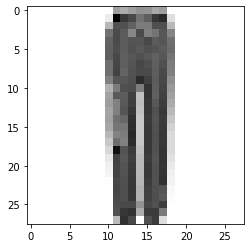

In [4]:
# Vamos a obtener la instancia número 1000 del dataset original

some_item = X.iloc[1000]
some_item_image = some_item.values.reshape(28,28)

plt.imshow(some_item_image, cmap="binary")
plt.show()

Ahora para visualizar más de una prenda por celda hacemos lo siguiente.

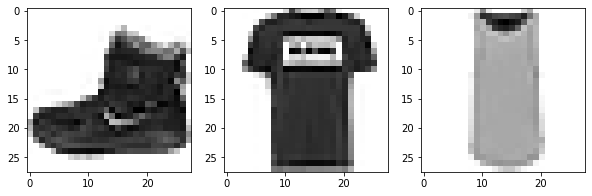

In [5]:
# Queremos una grilla de una fila y tres columnas
fig, axes = plt.subplots(1, 3, figsize=(10,10))

some_item_0 = X.iloc[0]
some_item_1 = X.iloc[1]
some_item_2 = X.iloc[2]

some_item_0_img = some_item_0.values.reshape(28, 28)
some_item_1_img = some_item_1.values.reshape(28, 28)
some_item_2_img = some_item_2.values.reshape(28, 28)

axes[0].imshow(some_item_0_img, cmap="binary")
axes[1].imshow(some_item_1_img, cmap="binary")
axes[2].imshow(some_item_2_img, cmap="binary")

plt.show()

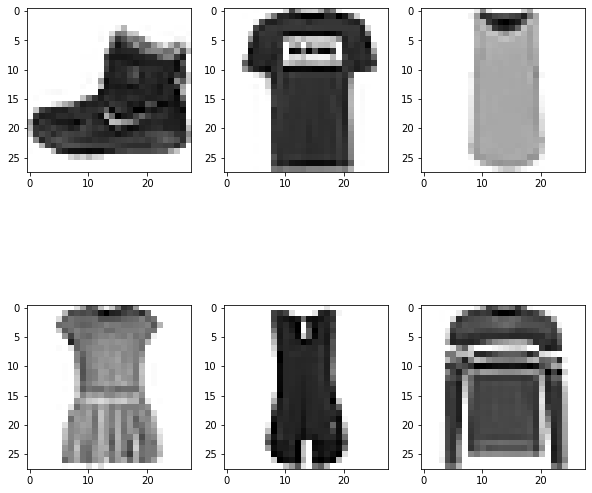

In [6]:
# Queremos una grilla de dos filas y tres columnas
fig, axes = plt.subplots(2, 3, figsize=(10,10))

some_item_0 = X.iloc[0]
some_item_1 = X.iloc[1]
some_item_2 = X.iloc[2]
some_item_3 = X.iloc[3]
some_item_4 = X.iloc[4]
some_item_5 = X.iloc[5]

some_item_0_img = some_item_0.values.reshape(28, 28)
some_item_1_img = some_item_1.values.reshape(28, 28)
some_item_2_img = some_item_2.values.reshape(28, 28)
some_item_3_img = some_item_3.values.reshape(28, 28)
some_item_4_img = some_item_4.values.reshape(28, 28)
some_item_5_img = some_item_5.values.reshape(28, 28)

axes[0][0].imshow(some_item_0_img, cmap="binary")
axes[0][1].imshow(some_item_1_img, cmap="binary")
axes[0][2].imshow(some_item_2_img, cmap="binary")
axes[1][0].imshow(some_item_3_img, cmap="binary")
axes[1][1].imshow(some_item_4_img, cmap="binary")
axes[1][2].imshow(some_item_5_img, cmap="binary")

plt.show()

Estandarizamos los datos

In [7]:
from sklearn.preprocessing import StandardScaler

std_sclr = StandardScaler()
X_std = std_sclr.fit_transform(X_sample)

Entrenamos el _autoencoder_.

In [8]:
from tensorflow import keras

num_dimensiones = len(X_sample.columns)

encoder = keras.models.Sequential([
    keras.layers.Dense(200, input_shape=[num_dimensiones], activation="selu"),
    keras.layers.Dense(50, activation="selu"),
    keras.layers.Dense(6, activation="selu"),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(50, input_shape=[6], activation="selu"),
    keras.layers.Dense(200, activation="selu"),
    keras.layers.Dense(num_dimensiones, activation="selu"),
])

autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(
    loss="mse", 
    optimizer=keras.optimizers.SGD(learning_rate=0.1)
)

history = autoencoder.fit(
    X_std, X_std, epochs=100,
    validation_data=(X_std, X_std),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)
                         
X_auto = encoder.predict(X_std)

Epoch 1/100
313/313 [==============================] - 2s 4ms/step - loss: 0.7600 - val_loss: 0.6256
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5884 - val_loss: 0.5544
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5318 - val_loss: 0.5121
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5012 - val_loss: 0.4911
Epoch 5/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4865 - val_loss: 0.4813
Epoch 6/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4776 - val_loss: 0.4729
Epoch 7/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4704 - val_loss: 0.4659
Epoch 8/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4632 - val_loss: 0.4584
Epoch 9/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4552 - val_loss: 0.4499
Epoch 10/100
313/313 [==============================] - 1s 3ms/step - loss: 0.4468 - val_lo

In [9]:
# Transformamos una imagen
some_item_0_std = std_sclr.transform([some_item_0])
some_item_0_compressed = encoder.predict(some_item_0_std)
print(some_item_0_compressed)

[[ 2.5163271   0.8828062  -0.745598   -1.4718858  -0.34606236  4.61099   ]]


Decodificamos cada imagen

In [10]:
some_item_0_inv = decoder.predict(some_item_0_compressed)
some_item_0_inv_no_std = std_sclr.inverse_transform(some_item_0_inv)
print(some_item_0_inv_no_std.shape)

(1, 784)


Volvemos a graficar

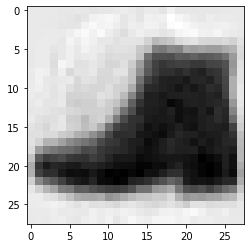

In [11]:
some_item_0_v2 = some_item_0_inv_no_std.reshape(28, 28)

plt.imshow(some_item_0_v2, cmap="binary")

Recordemos que la reducción de dimensionalidad de los $10,000$ elementos quedó en la variable `X_auto`.

In [12]:
X_auto

array([[-0.6766918 ,  0.8520524 ,  0.48572832,  1.6442432 , -1.4755602 ,
         4.3162794 ],
       [ 7.0544147 ,  3.5845604 ,  8.186722  ,  1.5819795 ,  7.967126  ,
        -0.1738594 ],
       [ 0.15543142,  3.0147812 ,  1.5084611 ,  9.859105  , 12.484352  ,
        -1.2506773 ],
       ...,
       [-1.3499318 ,  5.7339134 ,  0.08552422,  3.4287293 ,  1.0431155 ,
         1.5544951 ],
       [-0.62237704, -0.83128935, -0.41564706,  6.3937044 ,  8.138475  ,
         3.0285316 ],
       [-0.95728874, -0.24220118,  1.9453592 ,  2.847274  , -0.44072038,
         3.6607037 ]], dtype=float32)

Ahora hacemos `fit` de un modelo GMM.

In [13]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10, n_init=5)
y_pred_gmm = gmm.fit_predict(X_auto)

Obtenemos las medias y covarianzas de los 10 _clusters_.

In [14]:
gmm_means = gmm.means_
gmm_means

array([[ 8.98991237e+00,  6.33014980e+00,  7.01690838e+00,
         3.15990015e+00,  3.59423471e+00,  1.20729064e+01],
       [ 4.22658525e+00,  4.52859879e+00,  5.74153534e+00,
         1.44238663e+00,  4.52874994e+00,  6.86764437e-01],
       [ 1.32033317e+02,  5.39503350e+01,  4.63119687e+01,
         8.18601770e+01,  5.78361761e+01,  9.55710063e+01],
       [-5.05868164e-01,  8.85996471e-01,  4.08467976e+00,
         4.32109198e+00, -2.36250291e-01,  7.92087568e+00],
       [-1.88185190e-01,  3.32428073e+00,  9.53840402e-01,
         6.73606267e+00,  8.13337669e+00,  1.42815614e+00],
       [ 5.58316040e+00,  9.46035033e+00,  4.41696333e+00,
         7.02967790e+00,  8.25393509e+00,  5.29283587e+00],
       [ 1.12594369e+01,  7.03818380e+00,  4.03981116e+00,
         5.15168502e+00,  4.78883146e+00,  3.73429505e+00],
       [ 1.20866960e+00,  2.81591574e+00,  2.95738497e+00,
         1.97023702e+00,  3.37435527e+00,  4.43541222e-01],
       [ 3.15603061e+01,  2.04665333e+01,  1.491

In [15]:
gmm_cov = gmm.covariances_
gmm_cov

array([[[ 4.07334849e+01,  1.80970427e+01,  1.89088576e+01,
          1.46315727e+01,  2.14877438e+01,  4.43743089e+01],
        [ 1.80970427e+01,  1.28825381e+01,  8.31873520e+00,
          6.36158359e+00,  8.65550250e+00,  1.79153747e+01],
        [ 1.89088576e+01,  8.31873520e+00,  1.15673578e+01,
          8.49382792e+00,  1.07815456e+01,  2.49441338e+01],
        [ 1.46315727e+01,  6.36158359e+00,  8.49382792e+00,
          1.06195806e+01,  9.08947548e+00,  2.21548303e+01],
        [ 2.14877438e+01,  8.65550250e+00,  1.07815456e+01,
          9.08947548e+00,  1.38604056e+01,  2.66908758e+01],
        [ 4.43743089e+01,  1.79153747e+01,  2.49441338e+01,
          2.21548303e+01,  2.66908758e+01,  6.32236300e+01]],

       [[ 1.13645305e+01,  3.05970993e+00,  8.99296793e+00,
          2.70392008e+00,  7.17877447e+00,  3.49998154e+00],
        [ 3.05970993e+00,  8.77923408e+00,  1.58027469e+00,
          2.22311745e+00,  5.02401932e-02,  2.10043134e+00],
        [ 8.99296793e+00,  1.5

Definimos una función para obtener una instancia generada a partir del número de cluster.

In [16]:
def sample_cluster(cluster_id):
    sample = np.random.multivariate_normal(gmm_means[cluster_id], gmm_cov[cluster_id])
    return sample

Ahora vamos a utilizar esta función y graficar los resultados

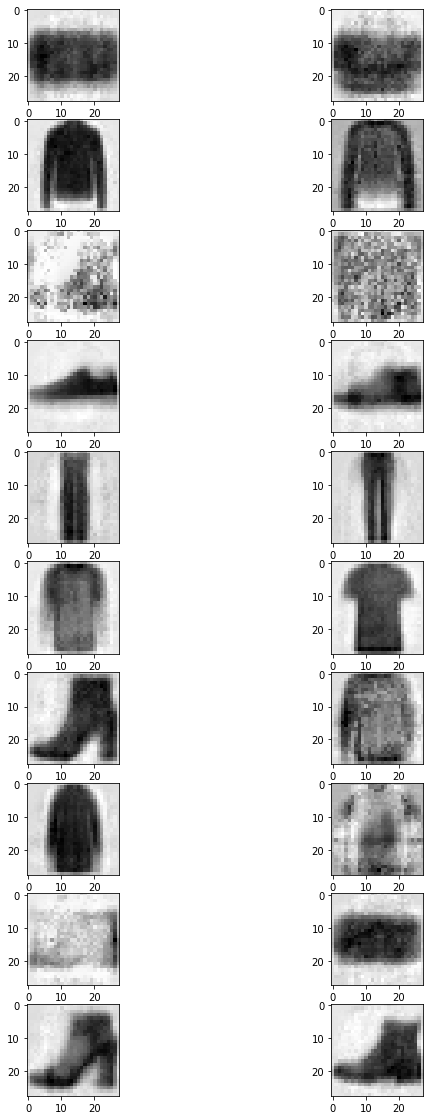

In [37]:
n_clusters = 10
n_samples = 2

fig, axes = plt.subplots(n_clusters, n_samples, figsize=(10,20))

for i in range(n_clusters):
    for j in range(n_samples):
        sample = sample_cluster(i)
        some_clothing_inv = decoder.predict(sample.reshape(1, 6))
        some_clothing_inv_no_std = std_sclr.inverse_transform(some_clothing_inv)
        some_clothing_image = some_clothing_inv_no_std.reshape(28, 28)
        axes[i, j].imshow(some_clothing_image, cmap="binary")

Ahora analizaremos visualmente la media.

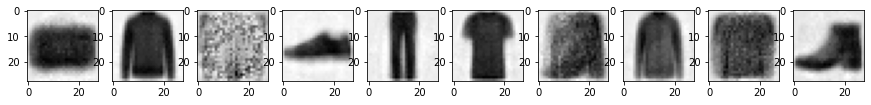

In [38]:
n_means = 10

fig, axes = plt.subplots(1, n_means, figsize=(15,15))

for i in range(n_means):
    mean_sample = gmm_means[i].reshape(1,6)
    mean_clothing_inv = decoder.predict(mean_sample)
    mean_clothing_inv_no_std = std_sclr.inverse_transform(mean_clothing_inv)
    mean_clothing_image = mean_clothing_inv_no_std.reshape(28, 28)
    axes[i].imshow(mean_clothing_image, cmap="binary")

Ahora veremos que pasa con GMM pero sin reducir la dimensionalidad.

In [19]:
X_std.shape

(10000, 784)

In [20]:
gmm_full = GaussianMixture(n_components=10)
y_pred_gmm_full = gmm_full.fit_predict(X_std)

In [21]:
gmm_means_full = gmm_full.means_
gmm_cov_full = gmm_full.covariances_

In [22]:
def sample_cluster_full(cluster_id):
    sample = np.random.multivariate_normal(gmm_means_full[cluster_id], gmm_cov_full[cluster_id])
    return sample

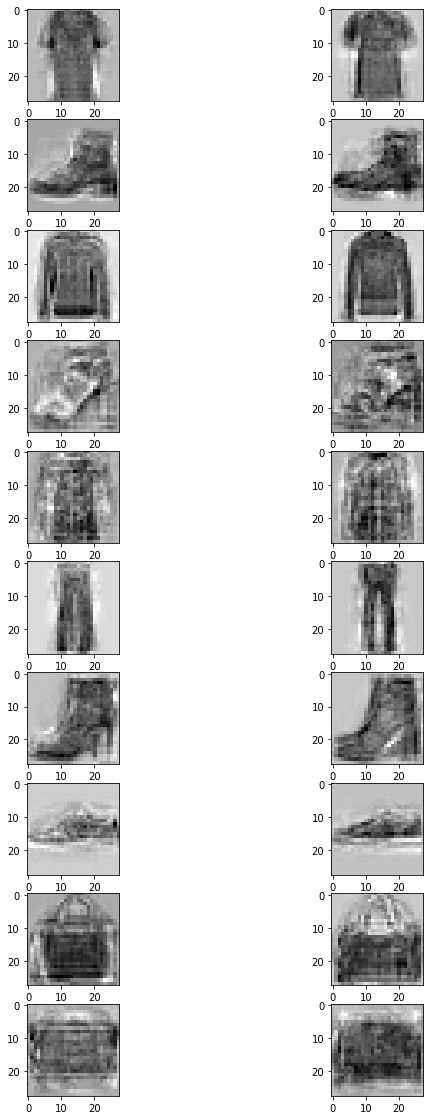

In [34]:
n_clusters = 10
n_samples = 2

fig, axes = plt.subplots(n_clusters, n_samples, figsize=(10,20))

for i in range(n_clusters):
    for j in range(n_samples):
        sample_full = sample_cluster_full(i)
        some_clothing_full_no_std = std_sclr.inverse_transform(sample_full)
        some_clothing_full_image = some_clothing_full_no_std.reshape(28, 28)
        axes[i, j].imshow(some_clothing_full_image, cmap="binary")

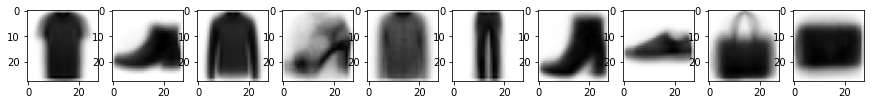

In [24]:
n_means = 10

fig, axes = plt.subplots(1, n_means, figsize=(15,15))

for i in range(n_means):
    mean_sample = gmm_means_full[i].reshape(1,784)
    mean_clothing_no_std = std_sclr.inverse_transform(mean_sample)
    mean_clothing_image = mean_clothing_no_std.reshape(28, 28)
    axes[i].imshow(mean_clothing_image, cmap="binary")

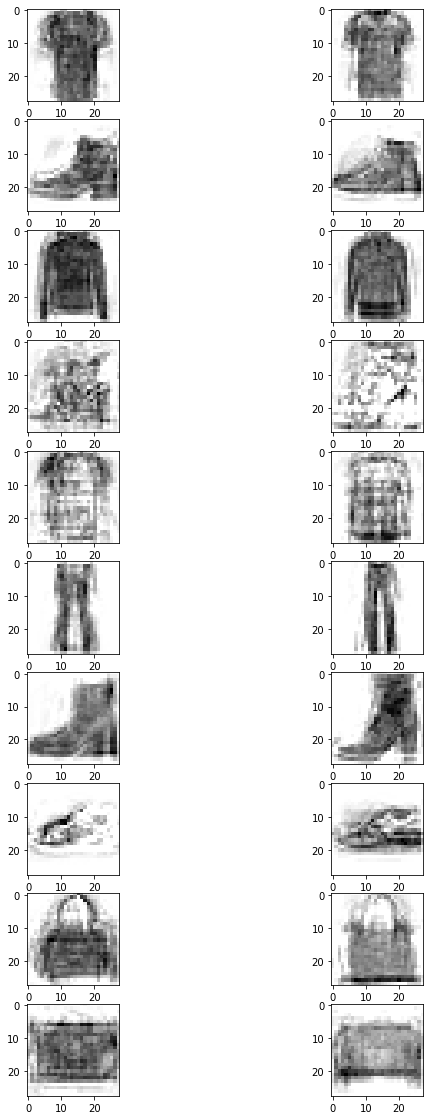

In [35]:
n_clusters = 10
n_samples = 2

fig, axes = plt.subplots(n_clusters, n_samples, figsize=(10,20))

for i in range(n_clusters):
    for j in range(n_samples):
        sample_full = sample_cluster_full(i)
        some_clothing_full_no_std = std_sclr.inverse_transform(sample_full)
        some_clothing_full_image = some_clothing_full_no_std.reshape(28, 28)
        axes[i, j].imshow(some_clothing_full_image.clip(min=0), cmap="binary")